In [1]:
"""
Script module, test th main functionnalities are always functionning and testing new function
"""
import unittest
from dubins import Dubins
from environment import StaticEnvironment
from dynamic_environment import DynamicEnvironment
from rrt import RRT
import matplotlib.pyplot as plt
import imageio
from tqdm import tqdm
from rrtPlanner import *


class TestSum():

    def test_dubins():
        """
        Tests that the class Dubins initializes
        """
        Dubins(10, 1)
        print('Dubins OK')

    def test_environment():
        """
        Tests that the class Environment initializes and plots
        """

        env = StaticEnvironment((100, 100), 20)
        #env.plot(close=False)
        print('Static Environment OK')

    def test_rrt():
        env = StaticEnvironment((100, 100), 20)
        diameter = 5
        rrt = RRT(env, (5, 5, 1), diameter)
        env.plot(display=False)
        # Selection of random starting and ending points
        start = env.random_free_space()
        end = env.random_free_space()

        # Trying first the euclidian distance
        rrt.set_start(start)
        # local, euclidian, chebyshev_dist, minkowski_dist, hamming_dist, cosine_dist
        rrt.run(end, 200, metric='local')
        #env.plot(display=False)
        rrt.plot(file_name='static'+str(1)+'.png', close=False, nodes=True)

    def test_distance():
        average1 = []
        average2= []
        average4= []
        average6= []
        average8= []
        average10= []
        average12= []
        diameter = 5
        total_iterations = 50

        # Inizializza la barra di progresso
        progress_bar = tqdm(total=total_iterations)

        radius = [1,2,4,6,8,10,12]
        for r in radius:
            for _ in range(0,50):
                ad = None
                while ad is None:      
                    env = StaticEnvironment((100, 100), 30)
                    diameter= r
                    rrt = RRT(env, (5, 5, 1),diameter, radius=4)
                    # Selection of random starting and ending points
                    start = env.random_free_space()
                    end = env.random_free_space()
                    # Trying first the local distance
                    rrt.set_start(start)    
                    # local, euclidian, chebyshev_dist, minkowski_dist, hamming_dist, cosine_dist
                    ad = rrt.run_average(end, 100, metric='local')
                    #print("debug")
                    
                if r == 1:
                    average1.append(ad)
                if r == 2:
                    average2.append(ad)
                if r == 4:
                    average4.append(ad)
                if r == 6:
                    average6.append(ad)
                if r == 8:
                    average8.append(ad)
                if r == 10:
                    average10.append(ad)
                if r == 12:
                    average12.append(ad)
                ad = None                   
                progress_bar.update(1)
                progress_bar.display()
                #rrt.plot(nodes=True)
                #env.plot(display=False)
                #rrt.plot(file_name='static'+str(1)+'.png', close=False, nodes=True)
        averages = [np.mean(average1), np.mean(average2), np.mean(average4),
                     np.mean(average6), np.mean(average8), np.mean(average10), np.mean(average12)]
        plt.plot(radius, averages, marker='o',color='orange')
        plt.xlabel('Radius')
        plt.ylabel('Average')
        plt.title('Graph of radius of path in low dimentional space')
        plt.legend()
        plt.show()
        print('Static RRT OK')


    def rrt_image():
        for r in range(0,3):
            for d in range(0,3): 
                ad = None
                while ad is None:
                    if d == 0:
                        print("env 5")
                        env = StaticEnvironment((100, 100), 5)
                    if d == 1:
                        print("env 10")
                        env = StaticEnvironment((100, 100), 10)
                    if d == 2:
                        print("env 20")
                        env = StaticEnvironment((100, 100), 20)
                    
                    if r == 0:
                        print("rad 1")
                        radius = 1
                    if r == 1:
                        print("rad 5")
                        radius = 5
                    if r == 2:
                        print("rad 8")
                        radius = 8

                    diameter= radius
                    rrt = RRT(env, (5, 5, 1),diameter, radius)
                    
                    # Selection of random starting and ending points
                    start = env.random_free_space()
                    end = env.random_free_space()

                    # Trying first the euclidian distance
                    rrt.set_start(start)
                    # local, euclidian, chebyshev_dist, minkowski_dist, hamming_dist, cosine_dist
                    ad = rrt.run(end, 500, metric='euclidian')
                    #env.delete_obj()
                env.plot(display=False)
                rrt.plot(file_name='image'+str(r)+str(d)+'.png', close=False, nodes=True)

    def test_planner():
        ph = None
        path = None
        #while ph is not None and path is None:
            
        env = StaticEnvironment((100, 100), 20)
        diameter = 5
        # Selection of random starting and ending points
        start = env.random_free_space()
        end = env.random_free_space()
        planner = RRTPlanner(start, end, env)
        path = planner.plan()

        rrt = RRT(env, (5, 5, 1), diameter)
        # Trying first the euclidian distance
        rrt.set_start(start)
        # local, euclidian, chebyshev_dist, minkowski_dist, hamming_dist, cosine_dist
        ph = rrt.run(end, 200, metric='local')

        # Plotting the path
        path = np.array(path)
        plt.figure()
        env.plot()
        
        plt.plot(path[:, 0], path[:, 1], '-g')
        plt.plot(start[0], start[1], 'bs')
        plt.plot(end[0], end[1], 'gs')
        rrt.plot(file_name='static'+str(1)+'.png', close=False, nodes=True)
        plt.show()

    def rrt_metrics():
        """
        Function that plot graph of average RRT in different number of object
        """
        averageLocal = []
        averageEuclidian= []
        averageChebyshev_dist= []
        averageMinkowski_dist= []
        averageHamming_dist= []
        averageCosine_dist= []
        diameter = 5
        total_iterations = 20

        # Inizializza la barra di progresso
        progress_bar = tqdm(total=total_iterations)
        radius = 5

        metrics = ['local', 'euclidian', 'chebyshev_dist', 'minkowski_dist', 'hamming_dist', 'cosine_dist']
        for i, metric in enumerate(metrics):
            # local, euclidian, chebyshev_dist, minkowski_dist, hamming_dist, cosine_dist
            ad = None
            count = 0
            for _ in range(0,50):
                while ad is None:      
                    env = StaticEnvironment((100, 100), 10)
                    diameter= radius
                    rrt = RRT(env, (5, 5, 1),diameter, radius)

                    # Selection of random starting and ending points
                    start = env.random_free_space()
                    end = env.random_free_space()
                    # Trying first the local distance
                    rrt.set_start(start)    
                    # local, euclidian, chebyshev_dist, minkowski_dist, hamming_dist, cosine_dist
                    ad = rrt.run_average(end, 100, metric=metric)
                    count+=1
                    print(ad)
                    if count == 300:
                        print("Jump : " + metric)
                        break
                if metric == 'local':
                    averageLocal.append(ad)
                if metric == 'euclidian':
                    averageEuclidian.append(ad)
                if metric == 'chebyshev_dist':
                    averageChebyshev_dist.append(ad)
                if metric == 'minkowski_dist':
                    averageMinkowski_dist.append(ad)
                if metric == 'hamming_dist':
                    averageHamming_dist.append(ad)
                if metric == 'cosine_dist':
                    averageCosine_dist.append(ad)
                ad = None
                count=0                    
                progress_bar.update(1)
                progress_bar.display()
                #rrt.plot(nodes=True)
                #env.plot(display=False)
                #rrt.plot(file_name='static'+str(1)+'.png', close=False, nodes=True)
        print(averageLocal)
        averages = [np.mean(averageLocal), np.mean(averageEuclidian), np.mean(averageChebyshev_dist),
                     np.mean(averageMinkowski_dist), np.mean(averageHamming_dist), np.mean(averageCosine_dist)]
        plt.plot(metrics, averages, marker='o',color='orange')
        plt.xlabel('Metrics')
        plt.ylabel('Average')
        plt.title('Graph of average of path in different dimentional space')
        plt.legend()
        plt.show()
        print('Static RRT OK')

    def test_rrt_loop():
        """
        Function that plot graph of average RRT in different number of object
        """
        average = []
        diameter = 5
        total_iterations = 10 

        # Inizializza la barra di progresso
        progress_bar = tqdm(total=total_iterations)

        counter = 0


        while len(average) != 10:
            ad = None
            while ad is None:      
                env = StaticEnvironment((100, 100), 10)
                rrt = RRT(env, (5, 5, 1), diameter)
                #env.plot(display=False)
                # Selection of random starting and ending points
                start = env.random_free_space()
                end = env.random_free_space()
                
                # Trying first the local distance
                rrt.set_start(start)    
                ad = rrt.run(end, 100, metric='local')
            average.append(ad)
            progress_bar.update(1)
            progress_bar.display()
            #rrt.plot(nodes=True)
            #env.plot(display=False)
            #rrt.plot(file_name='static'+str(1)+'.png', close=False, nodes=True)
        print(average)
        progress_bar.reset()
        average_highDimSpace = []
        diameter=1

        while len(average_highDimSpace) != 10:
            ad = None
            while ad is None:
                env = StaticEnvironment((100, 100), 100)
                rrt = RRT(env, (1, 5, 1), diameter)
                #env.plot(display=False)
                # Selection of random starting and ending points
                start = env.random_free_space()
                end = env.random_free_space()

                # Trying first the local distance
                rrt.set_start(start)
                ad = rrt.run(end, 100, metric='local')

            average_highDimSpace.append(ad)   
            progress_bar.update(1)
            progress_bar.display()   
            #rrt.plot(nodes=True)
            #env.plot(display=False)
            #rrt.plot(file_name='static'+str(1)+'.png', close=False, nodes=True)
        print(average_highDimSpace)
        progress_bar.close()
        # x axis values
        x = [1,2,3,4,5,6,7,8,9,10]
        plt.plot(x, average, label = "Low dimensional")
        plt.plot(x, average_highDimSpace, label = "High dimensional")
        plt.xlabel('Epoch')
        plt.ylabel('Average')
        plt.title('Graph of average of path in different dimentional space')
        plt.legend()
        plt.show()

        print('Static RRT OK')

    def test_dynamic_env():
        """
        Tests that the RRT works in a dynamic environement
        """
        
        env = DynamicEnvironment((100, 100), 5)
        diameter = 2
        rrt = RRT(env, (5, 5, 1), diameter)
        start = (50, 1, 1.57)
        end = (50, 99, 1.57)

        # Initialisation of the tree, to have a first edge
        rrt.set_start(start)
        rrt.run(end, 200, metric='local')

        # Initialisation of the position of the vehicle
        position = start[:2]
        current_edge = rrt.select_best_edge()

        for i in range(300):
            # We check if we are on an edge or if we have to choose a new edge
            if not current_edge.path:
                current_edge = rrt.select_best_edge()
            # Update the position of the vehicle
            position = current_edge.path.popleft()
            # Update the environment
            #   The frontiers of the sampling and the obstacles
            env.update(position)
            #   The position of the goal
            end = (50, position[1]+90, 1.57)
            # Continue the growth of the tree
            rrt.run(end, 2, metric='local')
            env.plot(display=False)
            rrt.plot(file_name='./images/static'+str(i)+'.png', close=False, nodes=True)
        print('Dynamic RRT OK')

    def test_dynamic_env_moving():
        """
        Tests that the RRT works with moving obstacles
        """

        env = DynamicEnvironment((100, 100), 5, moving=True)
        diameter = 5
        rrt = RRT(env, (5, 5, 1), diameter)
        start = (50, 1, 1.57)
        end = (50, 99, 1.57)

        # Initialisation of the tree, to have a first edge
        rrt.set_start(start)
        rrt.run(end, 200, metric='local')

        # Initialisation of the position of the vehicle
        position = start[:2]
        current_edge = rrt.select_best_edge()

        time = 0
        for i in range(300):
            time += 1
            # We check if we are on an edge or if we have to choose a new edge
            if not current_edge.path:
                time = rrt.nodes[current_edge.node_to].time
                current_edge = rrt.select_best_edge()
            # Update the position of the vehicle
            position = current_edge.path.popleft()
            # Update the environment
            #   The frontiers of the sampling and the obstacles
            env.update(position)
            #   The position of the goal
            end = (50, position[1]+90, 1.57)
            # Continue the growth of the tree
            rrt.run(end, 2, metric='local')
            env.plot(time, display=False)
            rrt.plot(file_name='./images/moving'+str(i)+'.png', close=True, nodes=True)
        print('Dynamic RRT with moving obstacles OK')

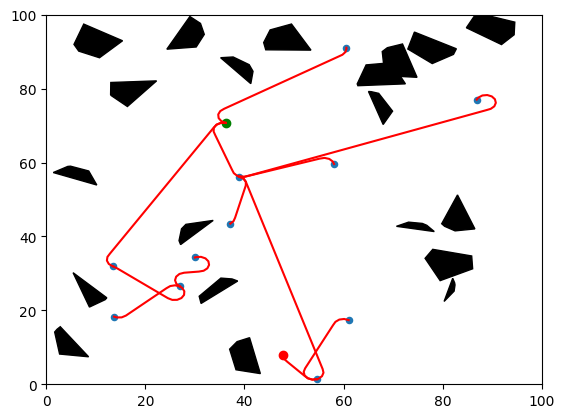

In [3]:
TestSum.test_rrt()

In [ ]:
TestSum.test_distance()

In [ ]:
TestSum.rrt_image()

In [ ]:
TestSum.rrt_metrics()

In [ ]:
TestSum.test_planner()

In [ ]:
TestSum.test_rrt_loop()

In [ ]:
TestSum.test_dynamic_env()

frames = []
for t in range(300):
    image = imageio.v2.imread(f'./images/static{t}.png')
    frames.append(image)

imageio.mimsave('./static.gif', # output gif
            frames,          # array of input frames
            duration = 30)         # optional: frames per second



TestSum.test_dynamic_env_moving()

frames = []
for t in range(300):
    image = imageio.v2.imread(f'./images/moving{t}.png')
    frames.append(image)

imageio.mimsave('./moving.gif', # output gif
            frames,          # array of input frames
            duration = 30)         # optional: frames per second